[Visit Keyphrase Extraction with BERT Transformers and Noun Phrases](https://towardsdatascience.com/enhancing-keybert-keyword-extraction-results-with-keyphrasevectorizers-3796fa93f4db)

In [3]:
!pip install keyphrase-vectorizers

  Obtaining dependency information for spacy>=3.0.1 from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-transformers>=1.1.6 from https://files.pythonhosted.org/packages/d0/39/5cb892704e154c6f0a6912dee62fc2a2f3254c08aa9274c3cd059fcd93b3/spacy_transformers-1.3.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/pa

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.12.2 which is incompatible.


In [4]:
!pip install keyBERT

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/86.0 kB ? eta -:--:--
     ---------------------------------------- 86.0/86.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for rich>=10.4.0 from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/f9/e6/3c821e7417acd82df89e39f09156ce80d58817b5b4b1ac5453b522bc5dd4/torchvision-0.16.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/977.5 kB ? eta -:--:--
     ------------------------------------  972.8/977.5 kB 30.1 MB/s eta 0:00:01
     ------------------------------------- 977.5/977.5 kB 20.6 MB/s eta 

### How to use KeyphraseVectorizers with KeyBERT?

In [5]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

import pandas as pd
import numpy as np

In [6]:
# Init KeyBERT
kw_model = KeyBERT()

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [7]:
# read the data
data = pd.read_excel('E:/OLD LAPTOP/Downloads/NLP/trainingfeedback_20122023.xlsx')

In [8]:
data

,Feedback,Comments,Suggestions,Ideas,Rating
0,It gives me a lot of knowledge that I can use ...,NaN,Love the training,TMU Course was damn helpful,3.0
1,clearness and conciseness of the course how it...,NaN,Thank you boss,all good,5.0
2,Live Scenarios and participation from everyone...,None,All good,no comments,2.0
3,"got to learn the right way to communicate, and...",NaN,"nothing needs to be changed.,",Wonderful & Information Session,NaN


In [9]:
# Storing the Feedback column
data_temp = pd.DataFrame(data['Feedback'], columns=['Feedback'])

In [10]:
# Additional feedback for testing
additional_feedback = [
    'The interactive sessions were incredibly helpful in grasping complex concepts.',
    'The course content was well-structured and easy to follow.',
    'I appreciated the practical exercises that reinforced the theoretical learning.',
    "The trainer's expertise and real-world examples enriched the learning experience.",
    'Great balance between theory and hands-on application in the course.',
    'The training materials provided valuable resources for future reference.',
    'I enjoyed the collaborative nature of the group discussions and activities.',
    'The course exceeded my expectations in terms of depth and breadth of content.',
    'The training sessions were engaging, making it easy to stay focused and interested.',
    'I feel more confident in applying the newly acquired skills in my work.'
]

# Adding additional feedback to the dataframe
additional_data = pd.DataFrame({'Feedback': additional_feedback})
combined_data = pd.concat([data_temp, additional_data], ignore_index=True)

# Displaying the combined dataframe
combined_data

,Feedback
0,It gives me a lot of knowledge that I can use ...
1,clearness and conciseness of the course how it...
2,Live Scenarios and participation from everyone...
3,"got to learn the right way to communicate, and..."
4,The interactive sessions were incredibly helpf...
5,The course content was well-structured and eas...
6,I appreciated the practical exercises that rei...
7,The trainer's expertise and real-world example...
8,Great balance between theory and hands-on appl...
9,The training materials provided valuable resou...


In [11]:
docs = ' '.join(combined_data['Feedback'].astype(str))
docs

"It gives me a lot of knowledge that I can use on my journey course and great learning experience clearness and conciseness of the course how it can help us communicate better course Live Scenarios and participation from everyone. Role plays & trainer guidance on where we lack. got to learn the right way to communicate, and put the right question or point with the team member or colleague The interactive sessions were incredibly helpful in grasping complex concepts. The course content was well-structured and easy to follow. I appreciated the practical exercises that reinforced the theoretical learning. The trainer's expertise and real-world examples enriched the learning experience. Great balance between theory and hands-on application in the course. The training materials provided valuable resources for future reference. I enjoyed the collaborative nature of the group discussions and activities. The course exceeded my expectations in terms of depth and breadth of content. The training

In [12]:
# Init KeyBERT
kw_model = KeyBERT()

In [15]:
!pip install requests

session = requests.Session()
session.headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.1.2222.33 Safari/537.36",
    "Accept-Encoding": "*",
    "Connection": "keep-alive"
}
response = session.get(self.request_url)

In [18]:
!pip install spaCy

In [19]:
# Extracting top 10 key phrases with corresponding scores using KeyphraseCountVectorizer() with KeyBERT
keyPhrases_df = pd.DataFrame(kw_model.extract_keywords(docs=docs, vectorizer=KeyphraseCountVectorizer(), top_n=10), columns=['KeyPhrases', 'Scores'])

In [20]:
keyPhrases_df

,KeyPhrases,Scores
0,training sessions,0.5943
1,trainer guidance,0.5609
2,training materials,0.5122
3,great learning experience clearness,0.5007
4,journey course,0.4965
5,learning experience,0.4879
6,course content,0.4872
7,trainer,0.4103
8,theoretical learning,0.3780
9,practical exercises,0.3538


In [21]:
def extract_key_phrases(data, text_column='Feedback', top_n=10):
    # Handle null values in the text column
    data[text_column] = data[text_column].fillna('')

    # Check if all records in the column are NaN
    if data[text_column].isna().all():
        print(f"All records in the column '{text_column}' are NaN. Nothing to process.")
        return pd.DataFrame(columns=['KeyPhrases', 'Scores'])

    # Ensure each feedback ends with a period
    data[text_column] = data[text_column].astype(str).apply(lambda x: x.strip() + '.' if not x.endswith('.') else x.strip())

    # Join all feedbacks as docs
    docs = ' '.join(data[text_column])

    # Initialize KeyBERT model
    kw_model = KeyBERT()

    # Extract top key phrases with corresponding scores
    key_phrases_scores = kw_model.extract_keywords(docs=docs, vectorizer=KeyphraseCountVectorizer(), top_n=top_n)

    # Create a DataFrame from the results
    key_phrases_df = pd.DataFrame(key_phrases_scores, columns=['KeyPhrases', 'Scores'])

    return key_phrases_df

In [22]:
# Extract top 10 key phrases with corresponding scores
keyPhrases_df = extract_key_phrases(combined_data, text_column='Feedback', top_n=10)

# Display the result DataFrame
keyPhrases_df

,KeyPhrases,Scores
0,training sessions,0.5979
1,trainer guidance,0.5630
2,great learning experience,0.5539
3,training materials,0.5210
4,journey course,0.4981
5,learning experience,0.4890
6,course content,0.4780
7,trainer,0.4162
8,theoretical learning,0.3824
9,practical exercises,0.3614


In [23]:
keyPhrases_df.to_csv('test.csv')

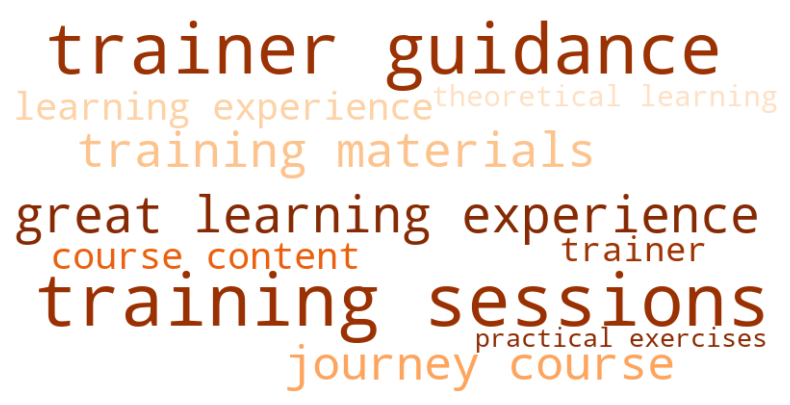

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary from the key phrases and scores in the DataFrame
key_phrases_dict = dict(zip(keyPhrases_df['KeyPhrases'], keyPhrases_df['Scores']))

# Generate the word cloud with custom layout
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Oranges_r', random_state=42).generate_from_frequencies(key_phrases_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()